模型评估指标
===

# 1.分类问题评估指标
分类问题的评估指标非常多，如下表所示

| 名称 | 定义 |
| --- | --- |
| Accuracy | 准确度 |
| Precision | 精度  |
| Recall | 召回率 |
| F1 score |   |
| ROC Curve |    |
| AUC |   |
| PR Curve |   |

## 1.1.混淆矩阵
![images](images/00_05_03_001.png)<br/>
混淆矩阵是监督学习中的一种可视化工具，主要用于比较分类结果和实例的真实信息。矩阵中的每一行代表实例的预测类别，每一列代表实例的真实类别。

| 名称 | 英文 | 含义 |
| --- | --- | --- |
| 真正 | True Positive, TP | 正样本，且被模型预测为正 |
| 假正 | False Positive, FP | 负样本，且被模型预测为正(误报) |
| 假负 | False Negative, FN | 正样本，且被模型与测试负(漏报) |
| 真负 | True Negative, TN | 负样本，且被模型预测为负 |

| 名称 | 英文 | 含义 |
| --- | --- | --- |
| 真正率 | TPR | $TPR=\frac{TP}{TP+FN}$ |
| 假正率 | FPR | $FPR=\frac{FP}{FP+TN}$ |
| 假负率 | FNR | $FNR=\frac{FN}{TP+FN}$ |
| 真负率 | TNR | $TNR=\frac{TN}{TN+FP}$ |

下面我们通过一个实例来说明这7中分类模型评估指标<br/>
我们的任务是为100名病人诊断一种在普通人群中患病率是50%的疾病。我们将假设一个黑盒模型，我们输入关于患者的信息，并得到0到1之间的分数。我们可以改变将患者标记为正例 (有疾病) 的阈值，以最大化分类器性能。我们将以0.1 为增量从 0.0 到 1.0 评估阈值,以下是每个阈值的分类结果:<br/>

| Threshold | TP | FP | TN | FN |
| --- | --- | --- | --- | --- |
| 0.0 | 50 | 50 | 0 | 0 |
| 0.1 | 48 | 47 | 3 | 2 |
| 0.2 | 47 | 40 | 9 | 4 |
| 0.3 | 45 | 31 | 16 | 8 |
| 0.4 | 44 | 23 | 22 | 11 |
| 0.5 | 42 | 16 | 29 | 13 |
| 0.6 | 36 | 12 | 34 | 18 |
| 0.7 | 30 | 11 | 38 | 21 |
| 0.8 | 20 | 4 | 43 | 33 |
| 0.9 | 12 | 3 | 45 | 40 |
| 1.0 | 0 | 0 | 50 | 50 |

## 1.2.准确率 - Accuracy
准确率是最常用的分类性能指标。
$$Accuracy = \frac{TP+TN}{TP+FN+FP+TN}$$
在阈值为0.5的情况下，准确率就是$\frac{42+29}{42+16+29+13}=0.71$

## 1.3.精确度 - Precision
精确率容易和准确率被混为一谈。其实，精确率只是针对预测正确的正样本而不是所有预测正确的样本。表现为预测出是正的里面有多少真正是正的。可理解为查准率。
$$Precision = \frac{TP}{TP+FP}$$
在阈值为0.5的情况下，精确度就是$\frac{42}{42+16}=0.724$

## 1.4.召回率 - Recall
召回率表现出在实际正样本中，分类器能预测出多少。与真正率相等，可理解为查全率。
$$Recall = \frac{TP}{TP+FN}$$
在阈值为0.5的情况下，召回率就是$\frac{42}{42+13}=0.76$

## 1.5.F1 Score
F值是精确率和召回率的调和值，更接近于两个数较小的那个，所以精确率和召回率接近时，F值最大。很多推荐系统的评测
指标就是用F值的。
$$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$
在阈值为0.5的情况下，F1 Score就是$2 * \frac{0.724 * 0.76}{0.724 + 0.76} = 0.74$

## 1.6.ROC曲线
![images](images/00_05_03_002.png)<br/>
横坐标是FPR，纵坐标是TPR，上面的点是不同的阈值下得到数据。一般情况下，这个曲线都应该处于(0,0)和(1,1)连线的上
方，也就是红色虚线的上方。ROC曲线越接近左上角，该分类器的性能越好。而且一般来说，如果ROC是光滑的，那么基本
可以判断没有太大的overfitting<br/>
![images](images/00_05_03_003.png)<br/>
ROC曲线有个很好的特性：当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变

## 1.7.AUC - Area Under Curve
被定义为ROC曲线下的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的
取值范围在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而
AUC作为数值可以直观的评价分类器的好坏，值越大越好

## 1.7.1.AUC的含义
首先AUC值是一个概率值，当你随机挑选一个正样本以及一个负样本，当前的分类算法根据计算得到的Score值将这个正样
本排在负样本前面的概率就是AUC值。当然，AUC值越大，当前的分类算法越有可能将正样本排在负样本前面，即能够更好
的分类<br/>
![images](images/00_05_03_004.png)<br/>
> - AUC = 1，是完美分类器，采用这个预测模型时，不管设定什么阈值都能得出完美预测。绝大多数预测的场合，不存在完美分类器。
> - 0.5 < AUC < 1，优于随机猜测。这个分类器（模型）妥善设定阈值的话，能有预测价值。
> - AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。
> - AUC < 0.5，比随机猜测还差；但只要总是反预测而行，就优于随机猜测。

## 1.8.PR曲线
PR曲线的横坐标是精确率P，纵坐标是召回率R。评价标准和ROC一样，先看平滑不平滑

[0.768      0.7572     0.78985    0.7729     0.77523333]
Macro AUC: 0.7716833333333333


Text(0.5,1,'ROC和AUC')

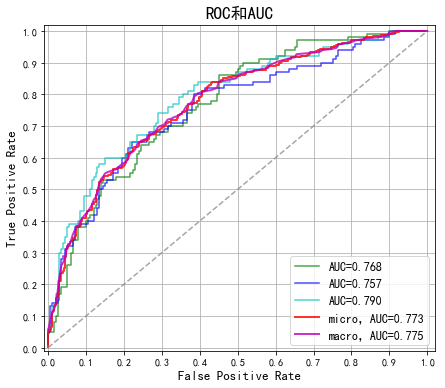

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn import metrics
from itertools import cycle

np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
n = 300
x = np.random.randn(n, 50)
y = np.array([0]*100+[1]*100+[2]*100)
n_class = 3

alpha = np.logspace(-3, 3, 7)
clf = LogisticRegression(penalty='l2', C=1)
clf.fit(x, y)
y_score = clf.decision_function(x)
y = label_binarize(y, classes=np.arange(n_class))
colors = cycle('gbc')
fpr = dict()
tpr = dict()
auc = np.empty(n_class+2)
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')
for i, color in zip(np.arange(n_class), colors):
    fpr[i], tpr[i], thresholds = metrics.roc_curve(y[:, i], y_score[:, i])
    auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], c=color, lw=1.5, alpha=0.7, label=u'AUC=%.3f' % auc[i])
# micro
fpr['micro'], tpr['micro'], thresholds = metrics.roc_curve(y.ravel(), y_score.ravel())
auc[n_class] = metrics.auc(fpr['micro'], tpr['micro'])
plt.plot(fpr['micro'], tpr['micro'], c='r', lw=2, ls='-', alpha=0.8, label=u'micro，AUC=%.3f' % auc[n_class])
# macro
fpr['macro'] = np.unique(np.concatenate([fpr[i] for i in np.arange(n_class)]))
tpr_ = np.zeros_like(fpr['macro'])
for i in np.arange(n_class):
    tpr_ += interp(fpr['macro'], fpr[i], tpr[i])
tpr_ /= n_class
tpr['macro'] = tpr_
auc[n_class+1] = metrics.auc(fpr['macro'], tpr['macro'])
print(auc)
print('Macro AUC:', metrics.roc_auc_score(y, y_score, average='macro'))
plt.plot(fpr['macro'], tpr['macro'], c='m', lw=2, alpha=0.8, label=u'macro，AUC=%.3f' % auc[n_class+1])
plt.plot((0, 1), (0, 1), c='#808080', lw=1.5, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True)
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title(u'ROC和AUC', fontsize=17)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.8770833333333333


[2.06913808 2.06913808 0.11288379]
0.8909722222222222


{'C': 0.11288378916846889}
0.8806944444444444


{'C': 0.18329807108324356, 'gamma': 0.4832930238571752}
0.892361111111111


Text(0.5,1,'鸢尾花数据不同分类器的ROC和AUC')

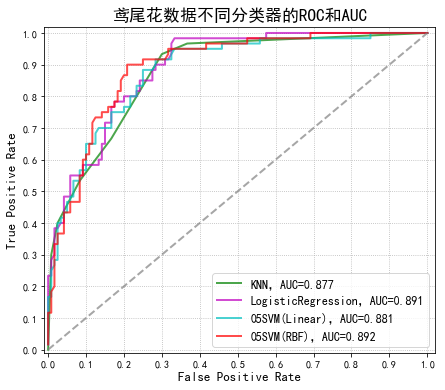

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from itertools import cycle

np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
data = pd.read_csv('data/iris.data', header=None)
iris_types = data[4].unique()
for i, iris_type in enumerate(iris_types):
    data.set_value(data[4] == iris_type, 4, i)
x = data.iloc[:, :2]
n, features = x.shape

y = data.iloc[:, -1].astype(np.int)
c_number = np.unique(y).size
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)
y_one_hot = label_binarize(y_test, classes=np.arange(c_number))
alpha = np.logspace(-2, 2, 20)
models = [
    ['KNN', KNeighborsClassifier(n_neighbors=7)],
    ['LogisticRegression', LogisticRegressionCV(Cs=alpha, penalty='l2', cv=3)],
    ['05SVM(Linear)', GridSearchCV(SVC(kernel='linear', decision_function_shape='ovr'), param_grid={'C': alpha})],
    ['05SVM(RBF)', GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid={'C': alpha, 'gamma': alpha})]]
colors = cycle('gmcr')
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')
for (name, model), color in zip(models, colors):
    model.fit(x, y)
    if hasattr(model, 'C_'):
        print(model.C_)
    if hasattr(model, 'best_params_'):
        print(model.best_params_)
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(x_test)
    else:
        y_score = model.decision_function(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(), y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print(auc)
    plt.plot(fpr, tpr, c=color, lw=2, alpha=0.7, label=u'%s，AUC=%.3f' % (name, auc))
plt.plot((0, 1), (0, 1), c='#808080', lw=2, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title(u'鸢尾花数据不同分类器的ROC和AUC', fontsize=17)

# 2.回归问题评估指标
回归问题的评估指标一般有三种

| 指标 | 描述 | 公式 | metrics方法 |
| --- | --- | --- | --- |
| Mean Abslute Error(MSE) | 平均绝对值 | $MAE=\frac{1}{n}\sum_{i=1}^n\|f_i-y_i\|$ | mean_absolute_error |
| Mean Square Error(MSE) | 平均方差 | $MSE=\frac{1}{n}\sum_{i=1}^n(f_i-y_i)^2$  | mean_squared_error |
| R-Squared | R平方值 | $R^2(y,\hat{y})=1-\frac{\sum_{i=0}^{n-1}(y_i-\hat{y})^2}{\sum_{i=0}^{n-1}(y_i-\bar{y})^2}$  | r2_score |